# Ordinary Differential Equations - Initial Value Problems

An Ordinary Differential Equation (ODE) is one in which there are no partial derivatives. A linear ODE is one in which *y* and all its derivatives are first order. In general this would be

$ a_0(x) y + a_1(x) y' + a_2(x) y'' + ... + a_n(x) y^{(n)} + b(x) = 0 $

The $a_i(x)$ and $b(x)$ do not need to be linear. Above is an *nth* order linear ODE.

In this module we will be focused on solving linear first order ODEs

$ a_0(x) y + a_1(x) y' + b(x) = 0$

Even more specifically, we will focus on *Initial Value Problems (IVP)* in which *y* is known at some initial value.

$y'=f(x,y)=\frac{-a_0(x)y-b(x)}{a_1(x)} ~~~~~ y(x_1) = y_1 $

## ODE Examples

Let's start with a common ODE that you have probably solved before. This is one where all we need to do is be able to integrate.

$ \frac{dy}{dx} = \frac{1}{x}~~~~~~~~~ dy = \frac{dx}{x}~~~~~~~~~ \int dy = \int \frac{dx}{x}~~~~~~~~~ y=\ln{x} + C  $

So we end up with a solution for $y$ but we don't know what $C$ is. The way we can know $C$ is by specifying an *initial condition*. For example, if we knew

$ y(x=2.0)=0~~~~~~ 0 = ln(2.0) + C~~~~~~C = -ln(2.0) = -0.6931 $

So that the particular solution is

$ y = ln(x) - 0.6931 $


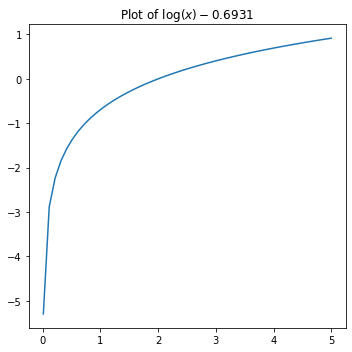

In [5]:
%matplotlib inline
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

fn_string = "ln(x) - 0.6931"
function_syms = sympy.latex(sympy.sympify(fn_string))

x = np.linspace(0.01,5)
y = [log(num)-0.6931 for num in x] 

fig = plt.figure(figsize=(5,5))

plt.plot(x,y)
plt.title(f"Plot of ${function_syms}$")

plt.tight_layout()
plt.show()


Let's examine the following ODE problem, where $a_1(x)=1$, $a_0(x)=-1$, and $b(x)=\frac{-c}{x^2}$ :

$y' = y - \frac{c}{x^2} $

One thing that might be helpful is to make a plot of $y'$. Here we are actually going to make what is known as a plot of the *streamlines* which just means lines that are tangent everywhere to $y'$.

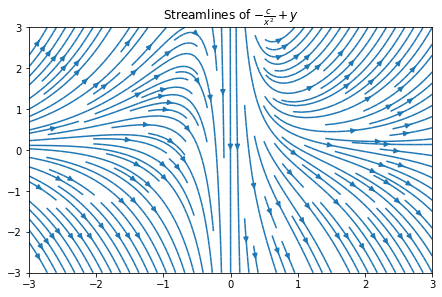

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sympy

yprime_string = "y - c/x**2"
function_syms = sympy.latex(sympy.sympify(yprime_string))

w = 3
c = 1
y, x = np.mgrid[-w:w:100j, -w:w:100j]
u = x/x
v = y-1/x**2
speed = np.sqrt(u**2 + v**2)

fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(x, y, u, v, density=1.5)
ax0.set_title(f"Streamlines of ${function_syms}$")

plt.tight_layout()
plt.show()

The takeaway from this graph is there are *many solutions* to the original differential equation.

The initial value is like specifying a starting point on one of the streamlines and following this streamline along - giving a unique solution for that initial value.




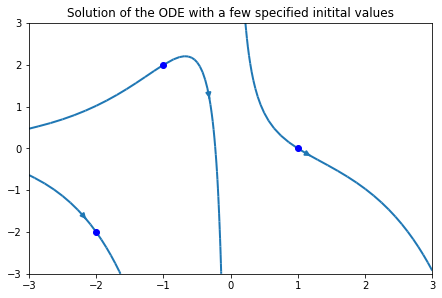

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
c = 1
y, x = np.mgrid[-w:w:100j, -w:w:100j]
u = x/x
v = y-1/x**2
speed = np.sqrt(u**2 + v**2)

fig = plt.figure(figsize=(12, 15))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

# Controlling the starting points of the streamlines
seed_points = np.array([[1,-1,-2], [0,2,-2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(x, y, u, v, linewidth=2,
                       start_points=seed_points.T)
ax3.set_title('Solution of the ODE with a few specified initital values')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))
plt.tight_layout()
plt.show()


## Explicit versus Implicit Techniques

The above graphs are helpful, but what we really need are numerical solutions for $y(x)$. So we now introduce techniques to solve ODEs numerically.

Before we jump into the details though, we need to make some definitions.

Through all of the techniques we discuss to solve ODEs we will call the technique *F* ... for example:

$ y_{i+1} = F(x_i,x_{i+1},y_i) $

The above method would be *explicit* because the formula for finding $y_{i+1}$ would be given.

An *implicit* method would be iterative to find each $y_{i+1}$, that is:

$ y_{i+1} = F(x_i,x_{i+1},y_{i+1}) $

So in an *implicit* method $y_{i+1}$ would appear on both sides of the equation, which may be OK, but it might be that finding the $y_{i+1}$ to satisfy the equation is non-linear and requires using a *root-finding* technique such as *Secant* method.


## Error

A convenient way to think about ODE solution is as a way of estimating the slope of $y$ at the point ($x_i$,$y_i$) and using that slope to predict the next point ($x_{i+1}$,$y_{i+1}$) as shown in the figure below.

![image info](./explicit_onestep.jpg)





In equation form this is represented by

$y_{i+1} = y_i + Slope \cdot h $

There are many ways to try to estimate the $Slope$ to use. Some only use one interval and one previous value of $y_i$ and some use multiple values of $x$ that lie in between $x_i$ and $x_{i+1}$.

There are two kinds of error that occur in solving ODEs: *Truncation* error and *Round-off* error. As discussed many times in class, round-off error is the unavoidable issue of the limited precision with which the decimals are preserved in calculations. Truncation error is due to the imperfectness of the estimate of the $Slope$. For each step from $x_i$ to $x_{i+1}$ there will be a *local* truncation error and over the entire domain of the solution there will be a *global* truncation error (the sum of the local truncation errors).

The graph below demonstrates how local and global error work. Here we have used the simplest algorithm there is, called *Euler's Method*, to show how local truncation error accumulates. By the way Euler's method just uses the value of $\frac{dy}{dx}\rvert_{x_i,y_i}$ as the value of $Slope$.


![image info](./euler_error.jpg)